 OBSERVABLE TRENDS
    + There are more rides on Urban cities.
    + Fares are higher on Rural cities (probably because of the trip distance)
    + Most of the drivers are in the Urban cities.

In [6]:
# Dependencies
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [7]:
# Read CSV
city_csv = pd.read_csv('city_data.csv')
ride_csv = pd.read_csv('ride_data.csv')
city_csv.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [8]:
ride_csv.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [9]:
pyber_df = pd.merge(city_csv, ride_csv, on="city")
pyber_cities_df = pyber_df.groupby(['city'])
pyber_cities_df = pyber_cities_df.mean()
pyber_cities_df = pyber_cities_df.drop(['ride_id'],1)
pyber_cities_df.head()

,driver_count,fare
city,,
Alvarezhaven,21.0,23.928710
Alyssaberg,67.0,20.609615
Anitamouth,16.0,37.315556
Antoniomouth,21.0,23.625000
Aprilchester,49.0,21.981579


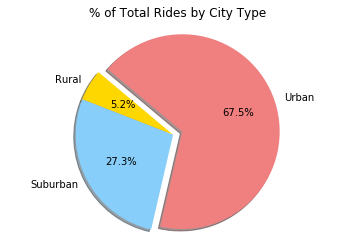

In [10]:
total_rides_city_type = pyber_df.groupby(['type'])
total_rides_city_type = total_rides_city_type['ride_id'].count()
total_rides_city_type

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [total_rides_city_type['Rural'], total_rides_city_type['Suburban'], total_rides_city_type['Urban'] ]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

#Add Title to the Pie Chart
plt.title("% of Total Rides by City Type")

# Prints our pie chart to the screen
plt.show()

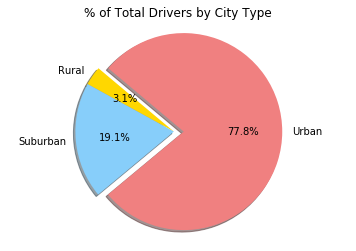

In [11]:
total_drivers_city_type = city_csv.groupby(['type'])
total_drivers_city_type = total_drivers_city_type['driver_count'].sum()
total_drivers_city_type

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [total_drivers_city_type['Rural'], total_drivers_city_type['Suburban'], total_drivers_city_type['Urban'] ]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

#Add Title to the Pie Chart
plt.title("% of Total Drivers by City Type")

# Prints our pie chart to the screen
plt.show()

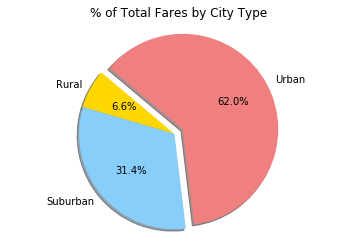

In [12]:
total_fare_city_type = pyber_df.groupby(['type'])
total_fare_city_type = total_fare_city_type['fare'].sum()
total_fare_city_type

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [total_fare_city_type['Rural'], total_fare_city_type['Suburban'], total_fare_city_type['Urban'] ]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

#Add Title to the Pie Chart
plt.title("% of Total Fares by City Type")

# Prints our pie chart to the screen
plt.show()

In [13]:

avg_fare_city = pyber_df
avg_fare_city['type'] = avg_fare_city['type'].replace({"Rural":0,"Suburban":1,"Urban":2})
avg_fare_city['type'] = avg_fare_city['type'].astype(int)
avg_fare_city = avg_fare_city.groupby(['city'])
avg_fare_city = avg_fare_city['fare'].mean()
avg_fare_city.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [14]:
rides_per_city = pyber_df 
#rides_per_city['type'] = rides_per_city['type'].replace({"Rural":0,"Suburban":1,"Urban":2})
#rides_per_city['type'] = rides_per_city['type'].astype(int)
rides_per_city = rides_per_city.groupby(['city'])
rides_per_city = rides_per_city['ride_id'].count()
rides_per_city.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [15]:
drivers_per_city = pyber_df
#drivers_per_city['type'] = drivers_per_city['type'].replace({"Rural":0,"Suburban":1,"Urban":2})
#drivers_per_city['type'] = drivers_per_city['type'].astype(int)
drivers_per_city = drivers_per_city.groupby(['city'])
drivers_per_city = drivers_per_city['driver_count'].mean()
drivers_per_city.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [20]:
pyber_type_df = pyber_cities_df.merge(rides_per_city.to_frame(), left_index=True, right_index=True)
pyber_type_df = pyber_type_df.merge(city_csv, left_index=True, right_on="city")
pyber_type_df = pyber_type_df.drop('driver_count_x', 1)
pyber_type_df = pyber_type_df.set_index('city')
pyber_type_df = pyber_type_df.rename(index=str, columns={"ride_id": "rides", "driver_count_y": "drivers"})
pyber_type_df = pyber_type_df.drop([0,"Port James"])
pyber_type_df.head()

,fare,rides,drivers,type
city,,,,
Alvarezhaven,23.928710,31,21,Urban
Alyssaberg,20.609615,26,67,Urban
Anitamouth,37.315556,9,16,Suburban
Antoniomouth,23.625000,22,21,Urban
Aprilchester,21.981579,19,49,Urban
Arnoldview,25.106452,31,41,Urban
Campbellport,33.711333,15,26,Suburban
Carrollbury,36.606000,10,4,Suburban
Carrollfort,25.395517,29,55,Urban


In [21]:
rural_df = pyber_type_df.loc[pyber_type_df['type'] == 'Rural']
suburban_df = pyber_type_df.loc[pyber_type_df['type'] == 'Suburban']
urban_df = pyber_type_df.loc[pyber_type_df['type'] == 'Urban']
urban_df.head()

,fare,rides,drivers,type
city,,,,
Alvarezhaven,23.928710,31,21,Urban
Alyssaberg,20.609615,26,67,Urban
Antoniomouth,23.625000,22,21,Urban
Aprilchester,21.981579,19,49,Urban
Arnoldview,25.106452,31,41,Urban


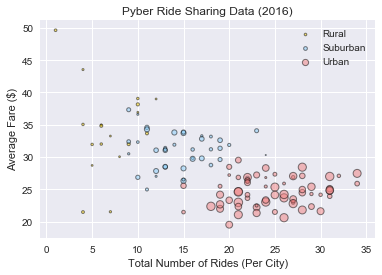

In [29]:
# create data
x = rural_df['rides']
y = rural_df['fare']
a = suburban_df['rides']
b = suburban_df['fare']
c = urban_df['rides']
d = urban_df['fare']

 
# use the scatter function
plt.scatter(x, y, s= rural_df['drivers'], c="gold", label="Rural", alpha=0.5, edgecolors = "black", linewidth=1)
plt.scatter(a, b, s= suburban_df['drivers'], c="lightskyblue", label="Suburban", alpha=0.5, edgecolors = "black", linewidth=1)
plt.scatter(c, d, s= urban_df['drivers'], c="lightcoral", label="Urban", alpha=0.5, edgecolors = "black", linewidth=1)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
sb.axes_style("darkgrid")
plt.show()
